In [1]:
from __future__ import print_function, division

In [2]:
%matplotlib inline
import matplotlib
from matplotlib import pylab
import seaborn

In [3]:
import numpy
import pandas
import itertools
import functools

In [4]:
import jug

In [5]:
jug.init("sequence_protease_susceptibility_analysis.py")
import sequence_protease_susceptibility_analysis

In [6]:
results = jug.value(sequence_protease_susceptibility_analysis.model_results)

In [7]:
rmse = lambda v: numpy.sqrt( numpy.mean( numpy.square(v) ) )

In [8]:
rframe = pandas.DataFrame.from_records([{
        "protease" : d,
        "weights_C" :  dict(p)["weights_C"],
        "rmse" : rmse(v.eval("ec50 - pred_ec50"))
    }
    for (d, p), v in results.items()
])

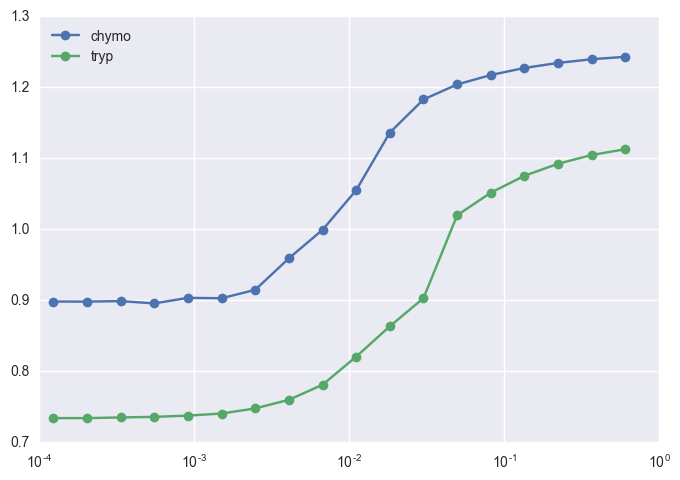

In [11]:
for key, grp in rframe.groupby(['protease']):
    grp = grp.sort_values("weights_C")
    pylab.plot(grp["weights_C"], grp["rmse"], "o-", label=key)
pylab.legend(loc="best")
pylab.xscale("log")